In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [3]:
sample = np.random.choice([1,2,3,4,5,6], 100)
print sample

[2 6 6 6 4 4 6 6 3 3 6 6 6 4 3 4 1 1 4 2 1 2 4 6 2 2 3 5 4 1 5 4 3 6 4 5 1
 5 3 1 5 2 6 2 3 1 4 5 6 2 1 6 6 5 3 3 4 1 5 4 1 1 1 6 4 1 6 5 4 5 5 1 2 4
 5 1 4 2 4 5 3 1 1 2 5 2 3 6 6 6 4 3 3 1 3 2 3 6 5 3]


Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [6]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({6: 20, 1: 18, 4: 18, 3: 16, 5: 15, 2: 13})
Вероятности выпадений каждой из сторон:
{1: 0.18, 2: 0.13, 3: 0.16, 4: 0.18, 5: 0.15, 6: 0.2}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [45]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
len(sample)

100


Эмпирическая функция распределения для полученной выборки:

In [0]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)


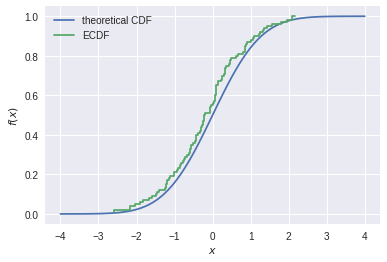

In [42]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

Гистограмма выборки:

Text(0.5,0,u'$x$')

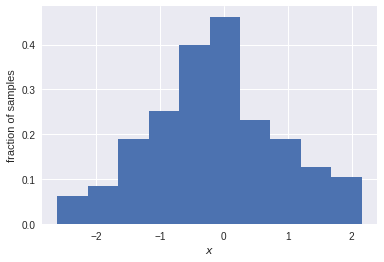

In [18]:
plt.hist(sample, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5,0,u'$x$')

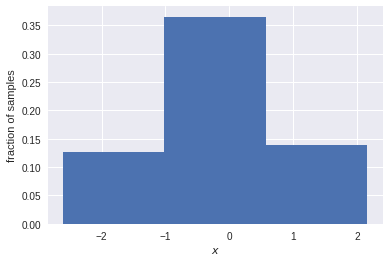

In [19]:
plt.hist(sample, bins=3, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,u'$x$')

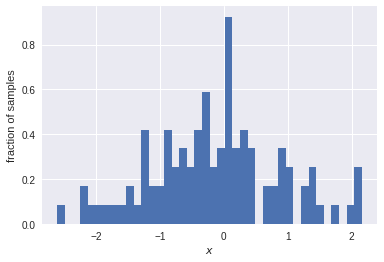

In [20]:
plt.hist(sample, bins=40, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

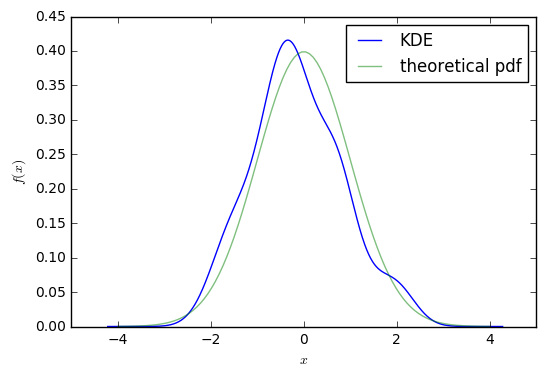

In [0]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [0]:
import math

In [40]:
round(1197.69 + 3 * math.sqrt(116182.2 / 131), 2)

1287.03

In [37]:
116182.2 / 131

-130